In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

In [21]:
House_price = pd.read_csv("/content/Mumbai House Prices.csv")

In [22]:
House_price.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [23]:
House_price.isnull().sum()

,0
bhk,0
type,0
locality,0
area,0
price,0
price_unit,0
region,0
status,0
age,0


In [24]:
House_price.info()
House_price.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bhk         76038 non-null  int64  
 1   type        76038 non-null  object 
 2   locality    76038 non-null  object 
 3   area        76038 non-null  int64  
 4   price       76038 non-null  float64
 5   price_unit  76038 non-null  object 
 6   region      76038 non-null  object 
 7   status      76038 non-null  object 
 8   age         76038 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.2+ MB


,bhk,area,price
count,76038.000000,76038.000000,76038.00000
mean,2.015111,1024.536850,29.38227
std,0.922754,670.276165,32.90345
min,1.000000,127.000000,1.00000
25%,1.000000,640.000000,1.75000
50%,2.000000,872.000000,5.50000
75%,3.000000,1179.000000,59.00000
max,10.000000,16000.000000,99.99000


In [25]:
def convert_price_unit(row):
    if row['price_unit'] == 'L':
        return row['price'] * 100000
    elif row['price_unit'] == 'Cr':
        return row['price'] * 10000000
    else:
        return row['price']


House_price['price'] = House_price.apply(convert_price_unit, axis=1)

House_price.drop('price_unit', axis=1, inplace=True)


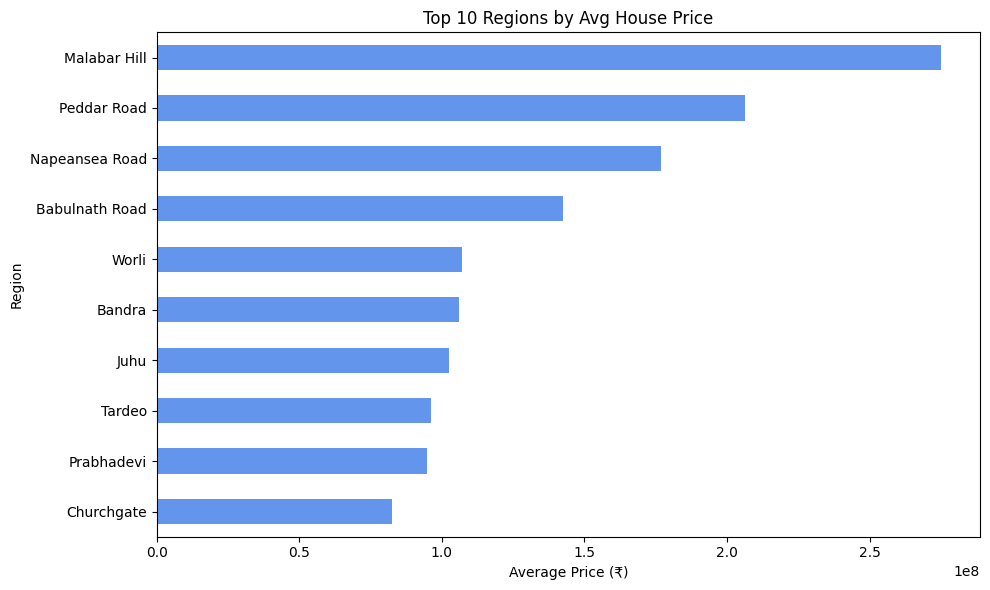

In [26]:
avg_price = House_price.groupby('region')['price'].mean().sort_values().tail(10)

plt.figure(figsize=(10,6))
avg_price.plot(kind='barh', color='cornflowerblue')
plt.title('Top 10 Regions by Avg House Price')
plt.xlabel('Average Price (₹)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


In [27]:
cat_col = House_price.select_dtypes(include = 'object').columns.tolist()
print(cat_col)

['type', 'locality', 'region', 'status', 'age']


In [28]:
from sklearn.preprocessing import OrdinalEncoder
oncoder = OrdinalEncoder()
House_price[cat_col] = oncoder.fit_transform(House_price[cat_col])

In [29]:
House_price.head()
House_price.describe()
House_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bhk       76038 non-null  int64  
 1   type      76038 non-null  float64
 2   locality  76038 non-null  float64
 3   area      76038 non-null  int64  
 4   price     76038 non-null  float64
 5   region    76038 non-null  float64
 6   status    76038 non-null  float64
 7   age       76038 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 4.6 MB


<Axes: >

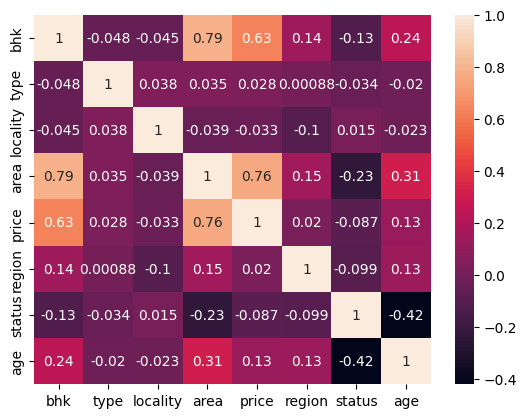

In [30]:
sns.heatmap(House_price.corr(), annot=True)

In [31]:
X = House_price.drop('price', axis = 1)
Y = House_price['price']

In [32]:
# df_sample = House_price.sample(n=10000, random_state=42)
# X = df_sample.drop('price', axis=1)
# y = df_sample['price']


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [34]:
print(X_train.shape)
print(Y_train.shape)

(60830, 7)
(60830,)


In [35]:
model = RandomForestRegressor(n_estimators=100,max_depth=15,n_jobs=-1,random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=15, n_jobs=-1, random_state=42)

In [36]:
import lightgbm as lgb

model2 = lgb.LGBMRegressor(n_estimators=100, max_depth=15)
model2.fit(X_train, Y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 690
[LightGBM] [Info] Number of data points in the train set: 60830, number of used features: 7
[LightGBM] [Info] Start training from score 16857816.078645


LGBMRegressor(max_depth=15)

In [37]:
y1_pred = model.predict(X_test)
y2_pred = model2.predict(X_test)

In [38]:
print("R2 Random forest score : ", r2_score(Y_test, y1_pred))
print("R2 light score : ", r2_score(Y_test, y2_pred))

R2 Random forest score :  0.8927642232708718
R2 light score :  0.8911512162112335


In [39]:
print("M1 MAS", mean_absolute_error(Y_test, y1_pred))
print("M2 MAS", mean_absolute_error(Y_test, y2_pred))

M1 MAS 2653025.910521322
M2 MAS 3120456.3819199563


In [40]:
print("M1 MSE", mean_squared_error(Y_test, y1_pred))
print("M2 MSE", mean_squared_error(Y_test, y2_pred))

M1 MSE 49005682965966.23
M2 MSE 49742811142751.53


In [41]:
sample_input = [[2, 0, 15, 640, 8, 1, 0]]
sample_input_np = np.array(sample_input)
prediction = model.predict(sample_input_np)
print(prediction[0])

22267338.51198143


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [42]:
import pickle

In [43]:
filename = 'House_price_pridictor.sav'

In [44]:
pickle.dump(model, open(filename, 'wb'))

In [45]:
loaded_model = pickle.load(open(filename, 'rb'))